In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import decimal
raw_data = pd.read_csv("metadata.csv", delimiter=";")

In [2]:
data = raw_data.copy()
data.dropna(inplace=True)
data['date'] = pd.to_datetime(data['date'])
data = data[data.stationID != "radiorst"]
data['stationID'].replace('18', 'AntenneAC', inplace=True)
data['stationID'].replace('41', 'RadioRST', inplace=True)
data['stationID'] = data['stationID'].str.lower()
data['interpret'] = data['interpret'].str.lower()
data['title'] = data['title'].str.lower()

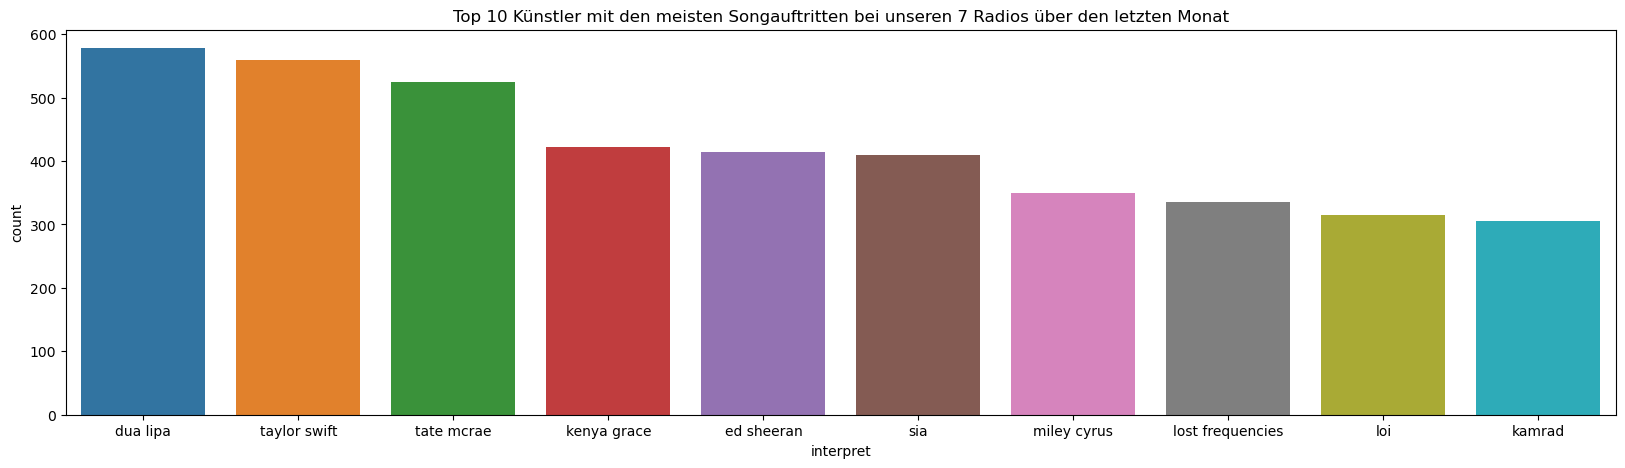

In [3]:
i = data['interpret'].value_counts().to_frame().reset_index()
i.head(30)

sns.barplot(x = i['interpret'].iloc[:10], y = i['count'].iloc[:10]).set(title='Top 10 Künstler mit den meisten Songauftritten bei unseren 7 Radios über den letzten Monat')
fig = plt.gcf()
fig.set_size_inches(20, 5)
plt.show()

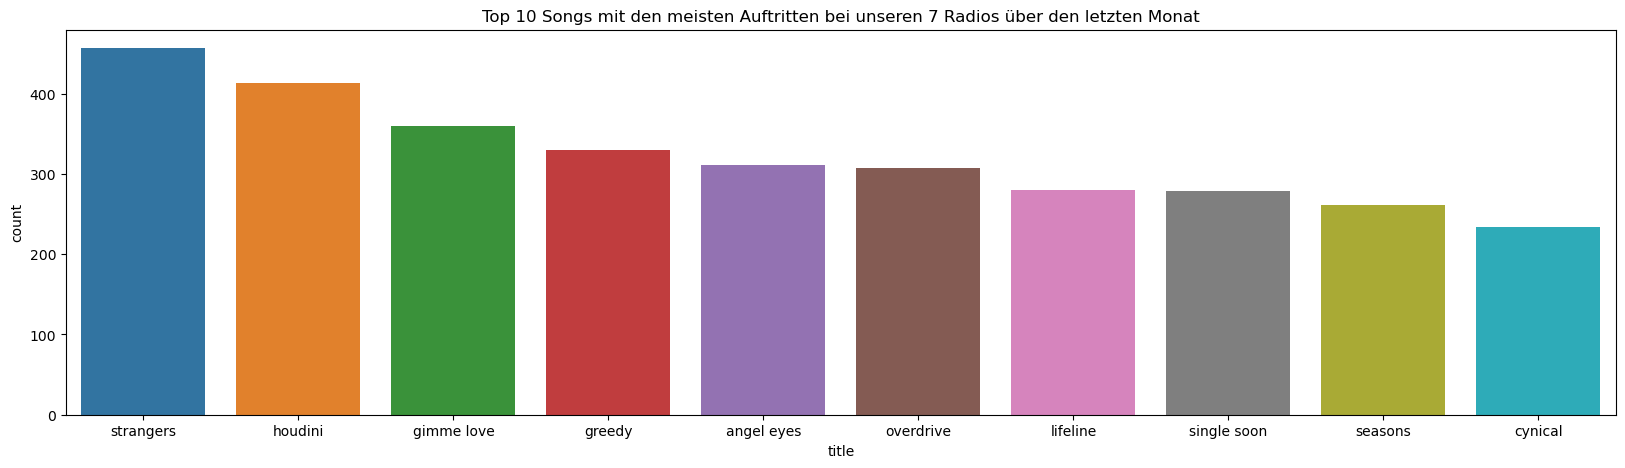

In [4]:
s = data['title'].value_counts().to_frame().reset_index()

sns.barplot(x = s['title'].iloc[:10], y = s['count'].iloc[:10]).set(title='Top 10 Songs mit den meisten Auftritten bei unseren 7 Radios über den letzten Monat')
fig = plt.gcf()
fig.set_size_inches(20, 5)
plt.show()

In [5]:
ac = data.loc[data['stationID'] == "antenneac"]
song_ac = ac['title'].value_counts().to_frame().reset_index()
song_ac = song_ac.rename(columns={"count": "AntenneAC_Count"})

rst = data.loc[data['stationID'] == "radiorst"]
song_rst = rst['title'].value_counts().to_frame().reset_index()
song_rst = song_rst.rename(columns={"count": "RadioRst_Count"})

In [6]:
result = pd.merge(song_ac, song_rst, on='title', how='outer')
result.fillna(0, inplace=True)
songpool = result['RadioRst_Count'].corr(result['AntenneAC_Count'])
result.head()

,title,AntenneAC_Count,RadioRst_Count
0,lifeline,73.0,71.0
1,strangers,70.0,70.0
2,houdini,61.0,53.0
3,dreaming,59.0,58.0
4,where you are,59.0,63.0


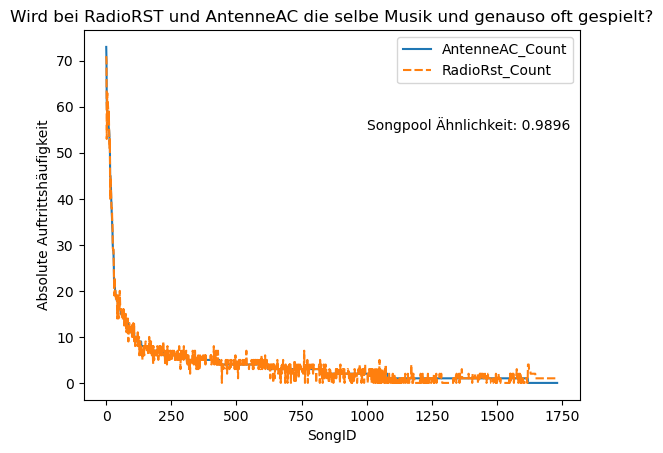

In [7]:
ax = sns.lineplot(data=result)
ax.text(1000, 55, 'Songpool Ähnlichkeit: '+str(round(songpool, 4)))
ax.set(xlabel='SongID', ylabel='Absolute Auftrittshäufigkeit', title="Wird bei RadioRST und AntenneAC die selbe Musik und genauso oft gespielt?")
plt.show()

In [8]:
ac = data.loc[data['stationID'] == "antenneac"]
song_ac = ac['title'].value_counts().to_frame().reset_index()
song_ac = song_ac.rename(columns={"count": "AntenneAC"})

rst = data.loc[data['stationID'] == "radiorst"]
song_rst = rst['title'].value_counts().to_frame().reset_index()
song_rst = song_rst.rename(columns={"count": "RadioRst"})

bay = data.loc[data['stationID'] == "bayern1main"]
song_bay = bay['title'].value_counts().to_frame().reset_index()
song_bay = song_bay.rename(columns={"count": "bayern1"})

live = data.loc[data['stationID'] == "1live"]
song_live = live['title'].value_counts().to_frame().reset_index()
song_live = song_live.rename(columns={"count": "1live"})

bremennext = data.loc[data['stationID'] == "bremennext"]
song_bremennext = bremennext['title'].value_counts().to_frame().reset_index()
song_bremennext = song_bremennext.rename(columns={"count": "bremennext"})

dashitradio = data.loc[data['stationID'] == "dashitradio"]
song_dashitradio = dashitradio['title'].value_counts().to_frame().reset_index()
song_dashitradio = song_dashitradio.rename(columns={"count": "100.5"})

wdr2 = data.loc[data['stationID'] == "wdr2"]
song_wdr2 = wdr2['title'].value_counts().to_frame().reset_index()
song_wdr2 = song_wdr2.rename(columns={"count": "wdr2"})

In [9]:
result1 = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(song_ac,song_rst,on='title',how='outer'),song_bay,on='title',how='outer'),song_live,on='title',how='outer'),song_wdr2,on='title',how='outer'),song_dashitradio,on='title',how='outer'),song_bremennext,on='title',how='outer')
result1.fillna(0, inplace=True)
result1 = result1.drop(["title"], axis=1)

[Text(0.5, 1.0, 'Songpool + Häufigkeit Correlationen')]

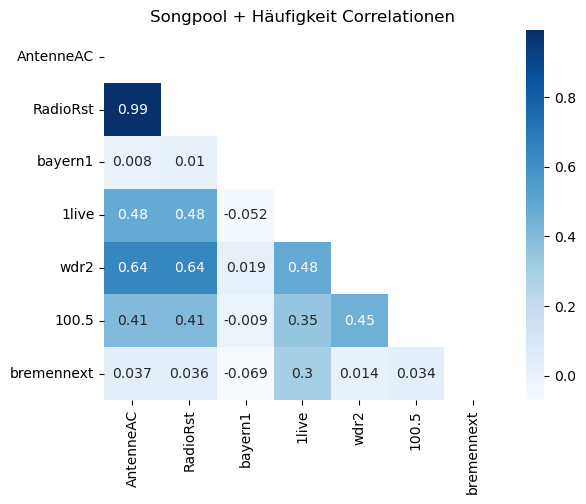

In [10]:
corr_matrix = result1.corr()
corr = np.triu(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap="Blues", mask=corr).set(title="Songpool + Häufigkeit Correlationen",)

[Text(0.5, 1.0, 'Songpool Correlationen')]

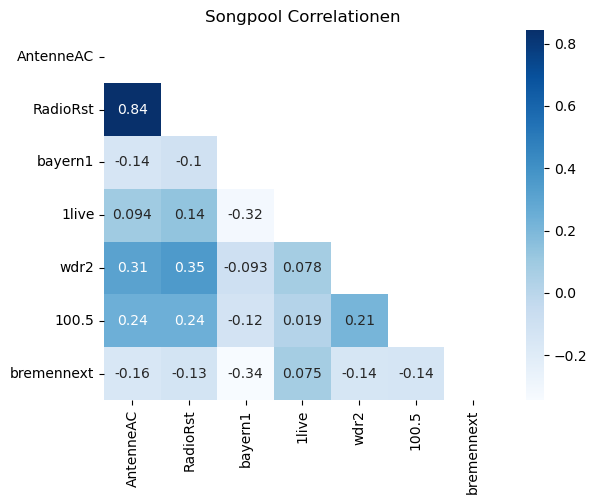

In [11]:
result2 = result1.copy()
result2.loc[result2['1live'] >= 1, '1live'] = 1
result2.loc[result2['AntenneAC'] >= 1, 'AntenneAC'] = 1
result2.loc[result2['RadioRst'] >= 1, 'RadioRst'] = 1
result2.loc[result2['bayern1'] >= 1, 'bayern1'] = 1
result2.loc[result2['wdr2'] >= 1, 'wdr2'] = 1
result2.loc[result2['100.5'] >= 1, '100.5'] = 1
result2.loc[result2['bremennext'] >= 1, 'bremennext'] = 1
corr_matrix1 = result2.corr()
corr1 = np.triu(corr_matrix1)

sns.heatmap(corr_matrix1, annot=True, cmap="Blues", mask=corr1).set(title="Songpool Correlationen")